Анализ оттока клиентов банка (поиск инсайтов, составление рекомендаций стейкхолдерам, построение модели оттока)

In [ ]:
#Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Загрузка и просмотр данных
data = pd.read_csv("Churn for Bank Customers.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Приводим название столбцов к нижнему регистру для удобства
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [ ]:
#Оставляем только важные для анализа столбцы
data = data[['creditscore', 'geography','gender', 'age', 'tenure', 'balance', 'numofproducts',
         'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']]
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Проверим общую информацию по данным для анализа
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Описание данных:

1.	CreditScore	- Кредитный рейтинг
2.	Geography	- Местоположение клиента
3.	Gender	- Пол клиента
4.	Age	- Возраст клиента
5.	Tenure	- Количество месяцев сотрудничества
6.	Balance	- Остаток на счете
7.	NumOfProducts -	Количество продуктов банка в собственности
8.	HasCrCard -	Наличие кредитной карты
9.	IsActiveMember - Статус клиента
10.	EstimatedSalary	- Расчетная зарплата
11.	Exited -	Результат: покинул/не покинул

In [ ]:
#Проверка количества пропусков по столбцам
data.isna().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [ ]:
#Поверка количества уникальных значений по столбцам
print('Number of unique values in each column:')
for label in data.columns:
        print(f'{label}: {data[label].nunique()}')

Number of unique values in each column:
creditscore: 460
geography: 3
gender: 2
age: 70
tenure: 11
balance: 6382
numofproducts: 4
hascrcard: 2
isactivemember: 2
estimatedsalary: 9999
exited: 2


In [ ]:
#Проверка на наличие дублей
data.duplicated().value_counts()

False    10000
dtype: int64

Проверка на наличие выбросов отдельно по разным группам показателей

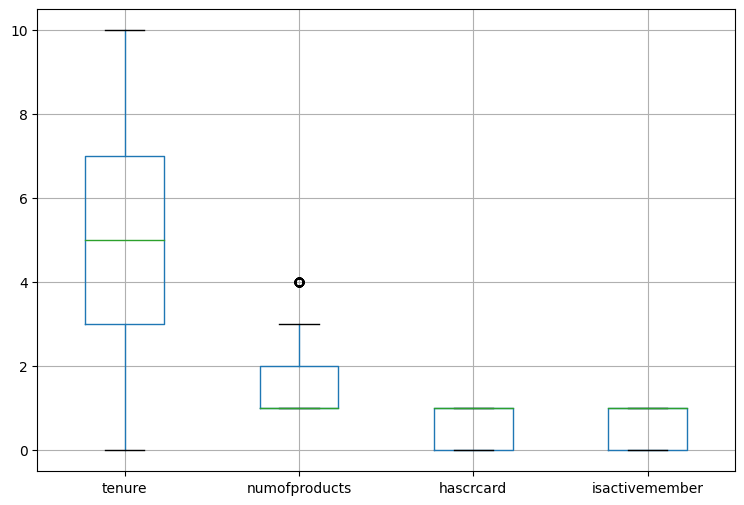

In [ ]:
boxplot = data.boxplot(column=['tenure', 'numofproducts', 'hascrcard', 'isactivemember'], figsize=(9,6))

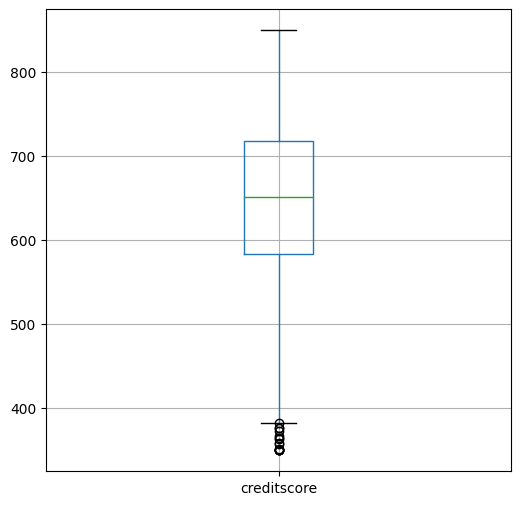

In [ ]:
boxplot = data.boxplot(column=['creditscore'], figsize=(6,6))

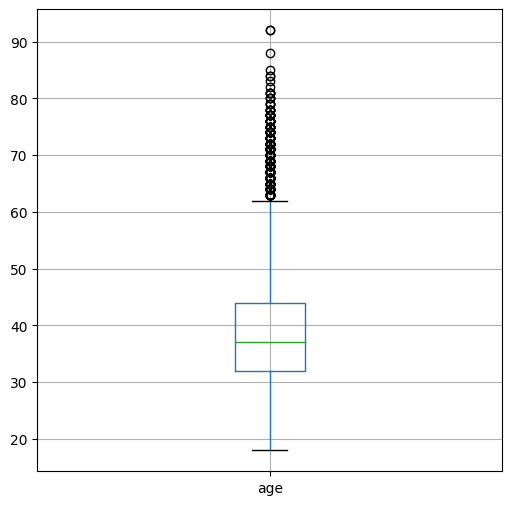

In [ ]:
boxplot = data.boxplot(column=['age'], figsize=(6,6))

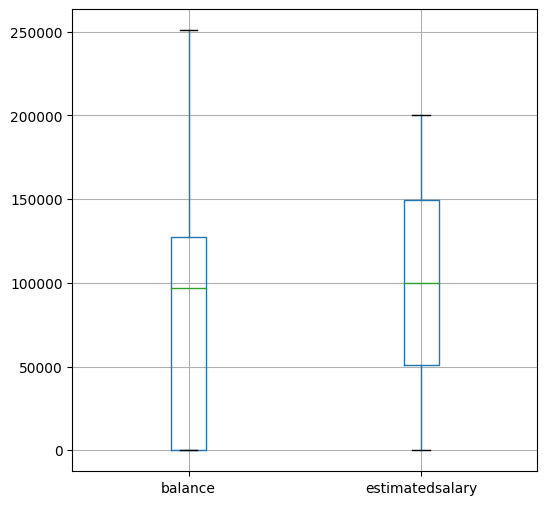

In [ ]:
boxplot = data.boxplot(column=['balance', 'estimatedsalary'], figsize=(6,6))

Пропуски, дубли, выбросы в данных отсутствуют, на анализ данные поступают корректные и в полном объеме.

Проверка и предобработка данных завершены.

Исследовательский анализ данных (EDA)

In [ ]:
#Посмотрим общую статистику по данным, округлив значения показателей
data[['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']].describe().round()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,651.0,39.0,5.0,76486.0,2.0,100090.0
std,97.0,10.0,3.0,62397.0,1.0,57510.0
min,350.0,18.0,0.0,0.0,1.0,12.0
25%,584.0,32.0,3.0,0.0,1.0,51002.0
50%,652.0,37.0,5.0,97199.0,1.0,100194.0
75%,718.0,44.0,7.0,127644.0,2.0,149388.0
max,850.0,92.0,10.0,250898.0,4.0,199992.0


На анализ представлены данные по 10 тысячам уникальных клиентов банка за 10 месяцев сотрудничества, это люди в возрасте от 18 до 92 лет, средний возраст клиентов составляет 39 лет, срок работы с ними в среднем 5 месяцев, они имеют в собственности в среднем 2 продукта и кредитный рейтинг 651.

In [ ]:
#Проверим количество клиентов по стране проживания
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

Большая часть клиентов проживает во Франции и почти такое же количество клиентов делят между собой Германия и Испания.

In [ ]:
#Проверим количество клиентов по полу
data['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

Клиенты мужского пола превышают клиентов женского пола.

In [ ]:
#Проверим количество оставшихся и ушедших клиентов
data['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

<Axes: xlabel='exited', ylabel='count'>

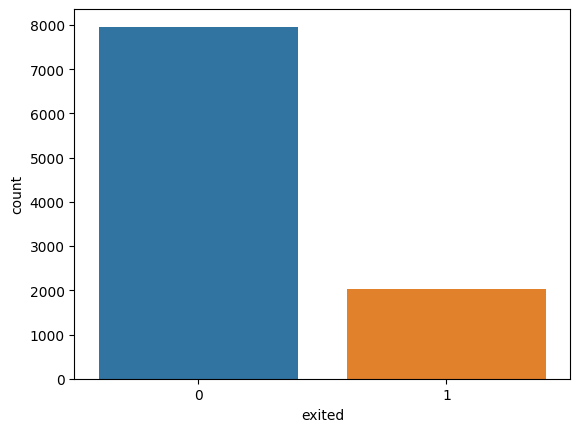

In [ ]:
sns.countplot(x='exited', data=data)

In [ ]:
#Определим какой процент клиентов уходит
exited_0 = (1 - sum(data['exited']) / len(data['exited'])) * 100
exited_1 = sum(data['exited']) / len(data['exited']) * 100
print(round(exited_0, 1))
print(round(exited_1, 1))

79.6
20.4


Пропорция между оставшимися и ушедшими клиентами: 80% к 20%. Это говорит нам о несбалансированности данных.

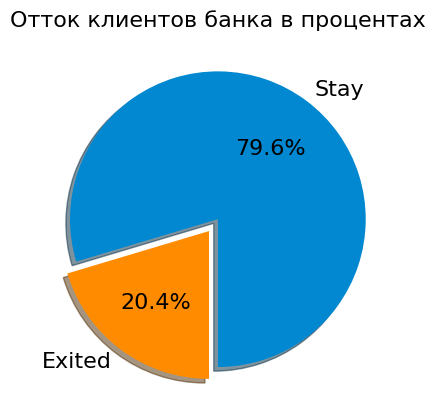

In [ ]:
# Визуализируем процент оттока
sizes = data['exited'].value_counts(sort = True)
colors = ['#0288d1','darkorange']
labels = 'Stay', 'Exited'
explode = (0, 0.1)

plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=270, textprops={'fontsize': 16})

plt.title('Отток клиентов банка в процентах', fontdict = {'fontsize' : 16})
plt.show()

Более 20% клиентов покинули банк, и только около 80% остались. То есть, если предположить, что каждый клиент останется в банке, мы будем правы только в 80% случаев, поэтому для того, чтобы модель прогноза оттока клиентов была эффективной, она должна превзойти эту цель в 80%.

<Axes: xlabel='creditscore', ylabel='Count'>

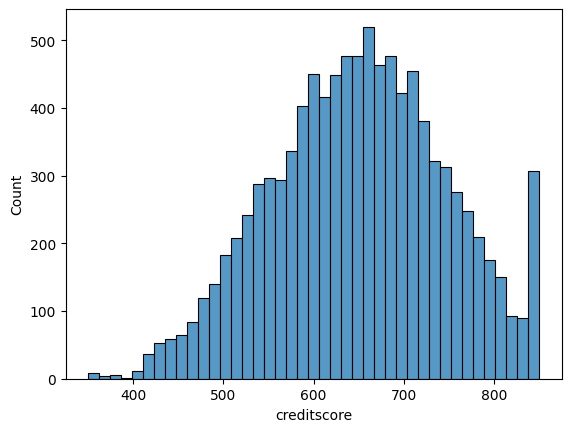

In [ ]:
#Распределение клиентов по кредитному рейтингу
sns.histplot(x = 'creditscore', data = data)

По кредитному рейтингу клиенты равномерно распределены, но есть почти 300 клиентов с очень высоким показателем кредитного рейтинга - 850.

<Axes: xlabel='balance', ylabel='Count'>

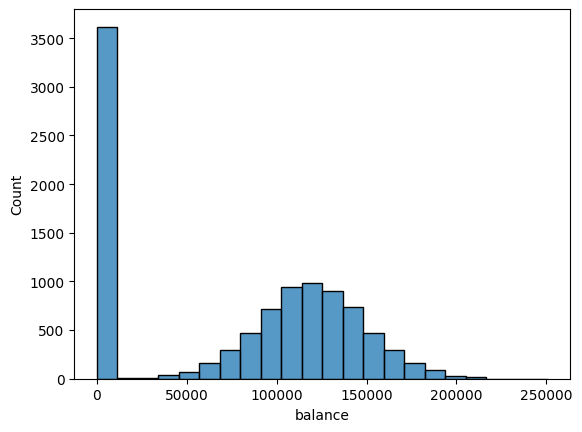

In [ ]:
#Распределение клиентов по балансу счета
sns.histplot(x = 'balance', data = data)

По балансу счета также распределение нормальное, но есть клиенты, у которых нулевой баланс и при этом они имеют активный статус.

<Axes: xlabel='estimatedsalary', ylabel='Count'>

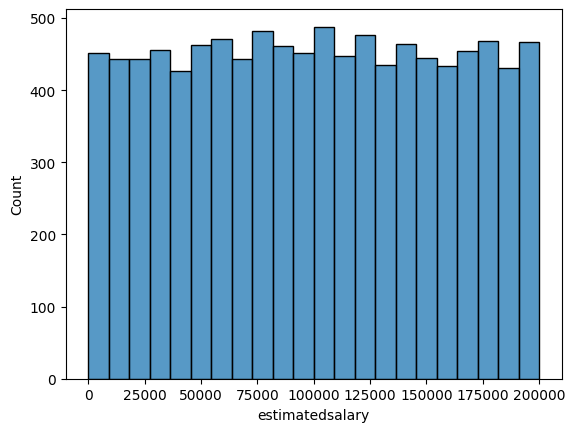

In [ ]:
#Распределение клиентов по расчетной заработной плате
sns.histplot(x = 'estimatedsalary', data = data)

Гистограмма расчетной заработной платы показывает однородное распределение. Примерно одинаковое количество клиентов имеет схожий показатель расчетной заработной платы.

<Axes: xlabel='tenure', ylabel='count'>

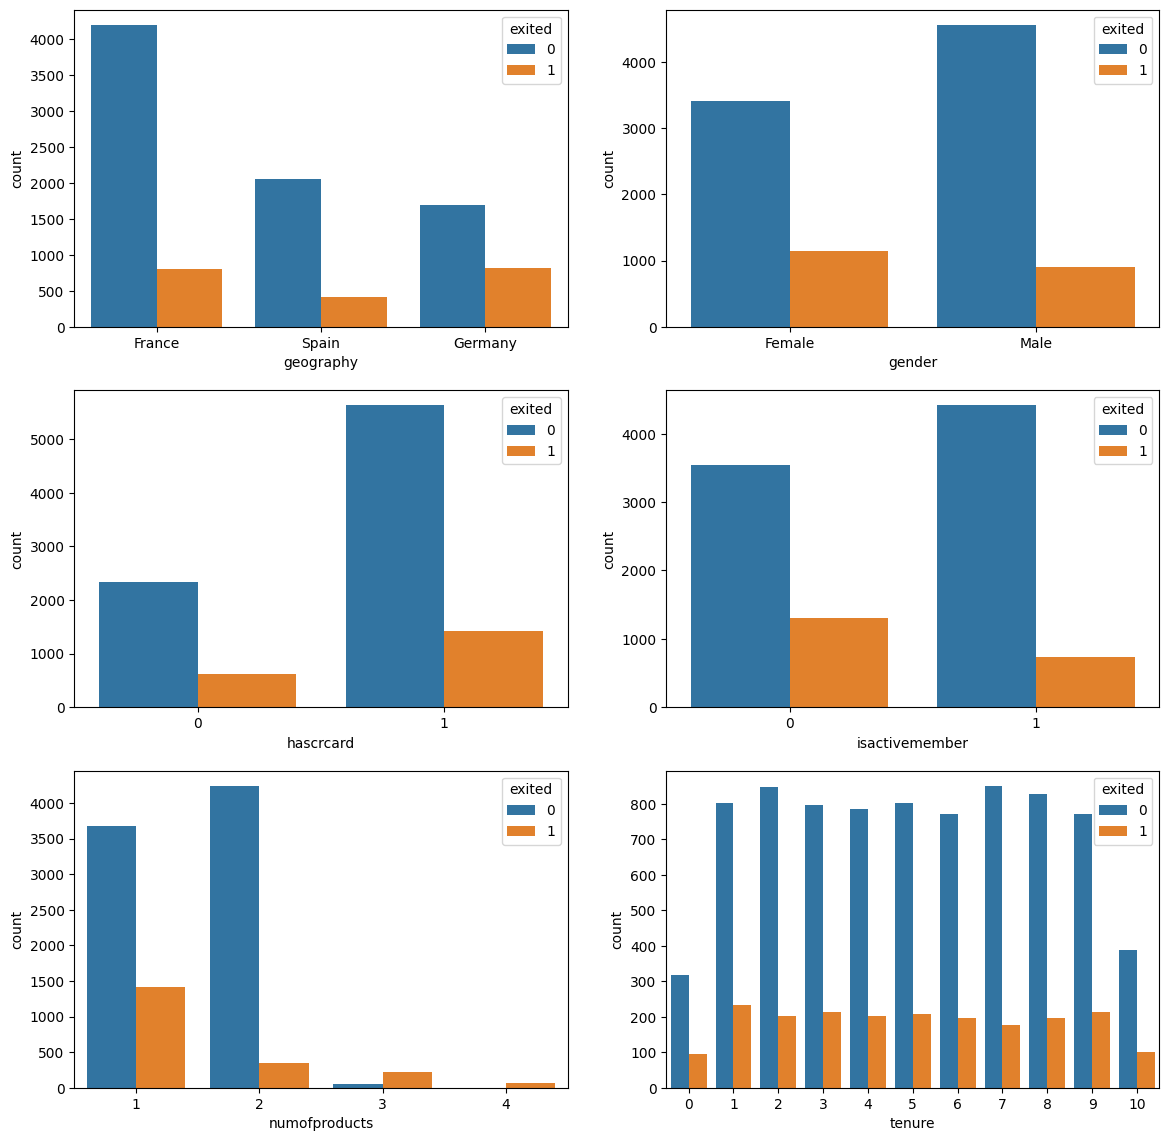

In [ ]:
#Посмотрим на графиках количество оставшихся и ушедших клиентов по ряду ключевых показателей
fig, axarr = plt.subplots(3, 2, figsize=(14, 14))

sns.countplot(x='geography', hue = 'exited', data = data, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = data, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = data, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = data, ax=axarr[1][1])
sns.countplot(x='numofproducts', hue = 'exited',data = data, ax=axarr[2][0])
sns.countplot(x='tenure', hue = 'exited',data = data, ax=axarr[2][1])

Так как наша целевая переменная – отток клиентов банка (столбец Exited), то оценим корреляцию всех критериев с данным показателем.

По стране проживания показатель оттока клиентов разделился почти поровну между Францией и Германией, но разница в том, что клиентов, проживающих во Франции, в 2 раза больше.

Отток среди женщин выше и составляет почти 56% к 44% среди мужчин, 1139 к 898 соответственно.

Неактивные клиенты в 63,9% случаев покидают компанию.

Клиенты, имеющие кредитную карту, более чем в два раза чаще отказываются от услуг банка.

Клиенты, имеющие в собственности всего 1 продукт банка, в 69% случаев отказываются от услуг банка, нежели собственники 2 и более продуктов.

По показателю количество месяцев сотрудничества, можно заметить лишь тот факт, что в первый и в последний месяцы обслуживания клиенты покидают компанию реже в среднем в два раза, чем клиенты со стажем 1-9 месяцев.

In [ ]:
data_1 = data[['creditscore', 'age', 'balance', 'estimatedsalary']]

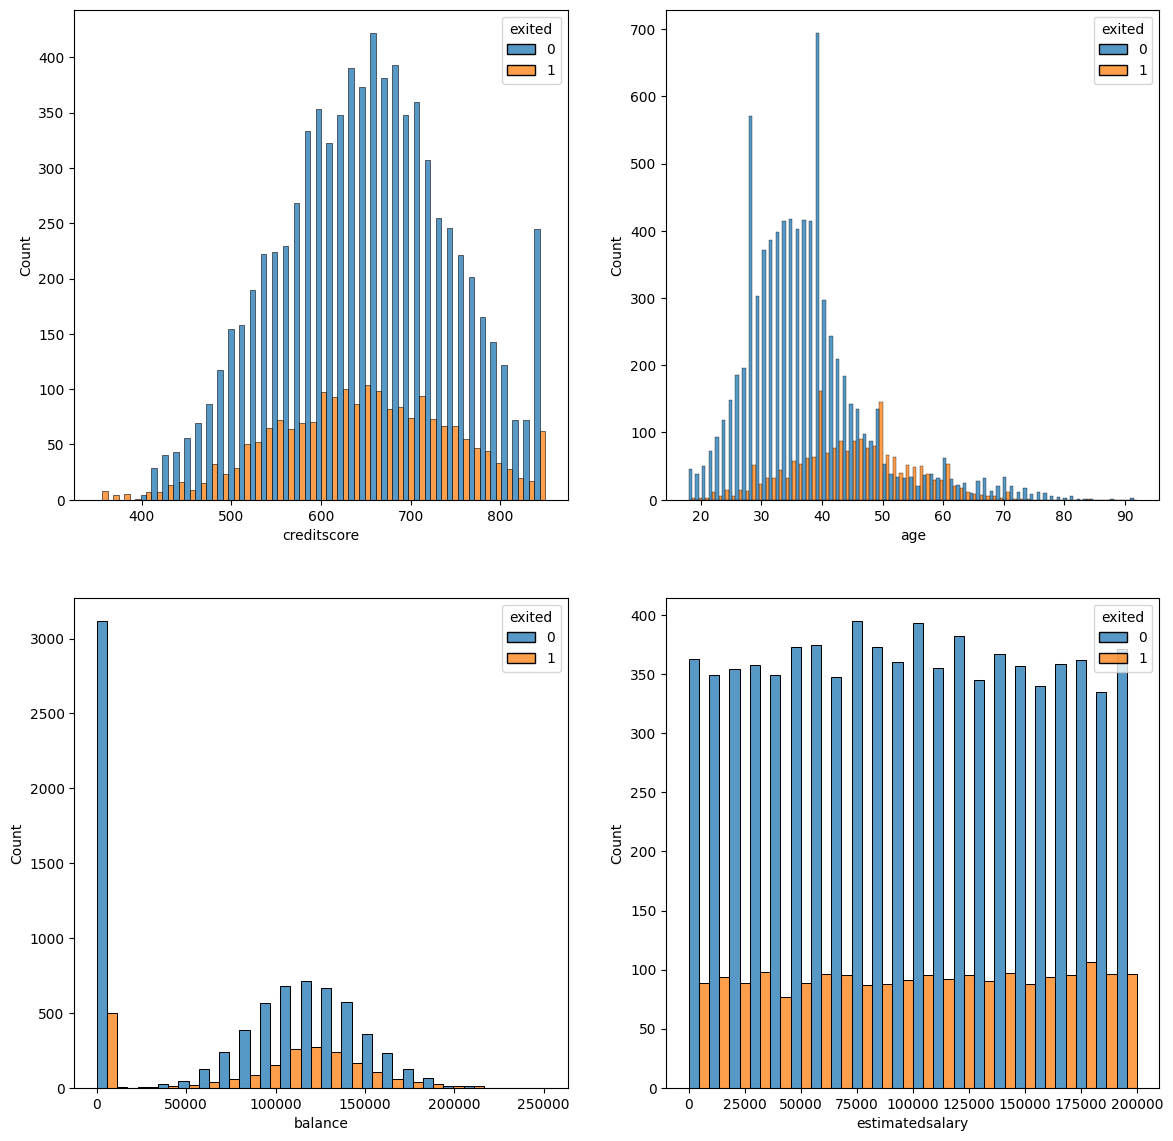

In [ ]:
#Посмотрим на графиках количество оставшихся и ушедших клиентов по ряду ключевых показателей
plt.figure(figsize = (14,14))
for i in enumerate(data_1):
    plt.subplot(2,2, i[0]+1)
    _= sns.histplot(data, x=i[1], hue = 'exited',multiple="dodge")

По показателю баланс счета прослеживается не сильная взаимосвязь с оттоком, гистограмма показывает, что среднее значение баланса немного выше у тех клиентов, которые покинули компанию.

Клиенты с более высоким уровнем дохода и кредитным рейтингом в среднем будут уходить чаще, чем люди со стабильным, но средним или ниже среднего доходом.

In [ ]:
#Находим категориальные переменные и преобразуем их в числовые, для дальнейшего обучения модели
data.select_dtypes(include='object').nunique()

geography    3
gender       2
dtype: int64

In [ ]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['geography'] = data['geography'].map({'France':0, 'Germany':1, 'Spain':2})
data['gender'] = data['gender'].map({'Female':0, 'Male':1})

Корреляция

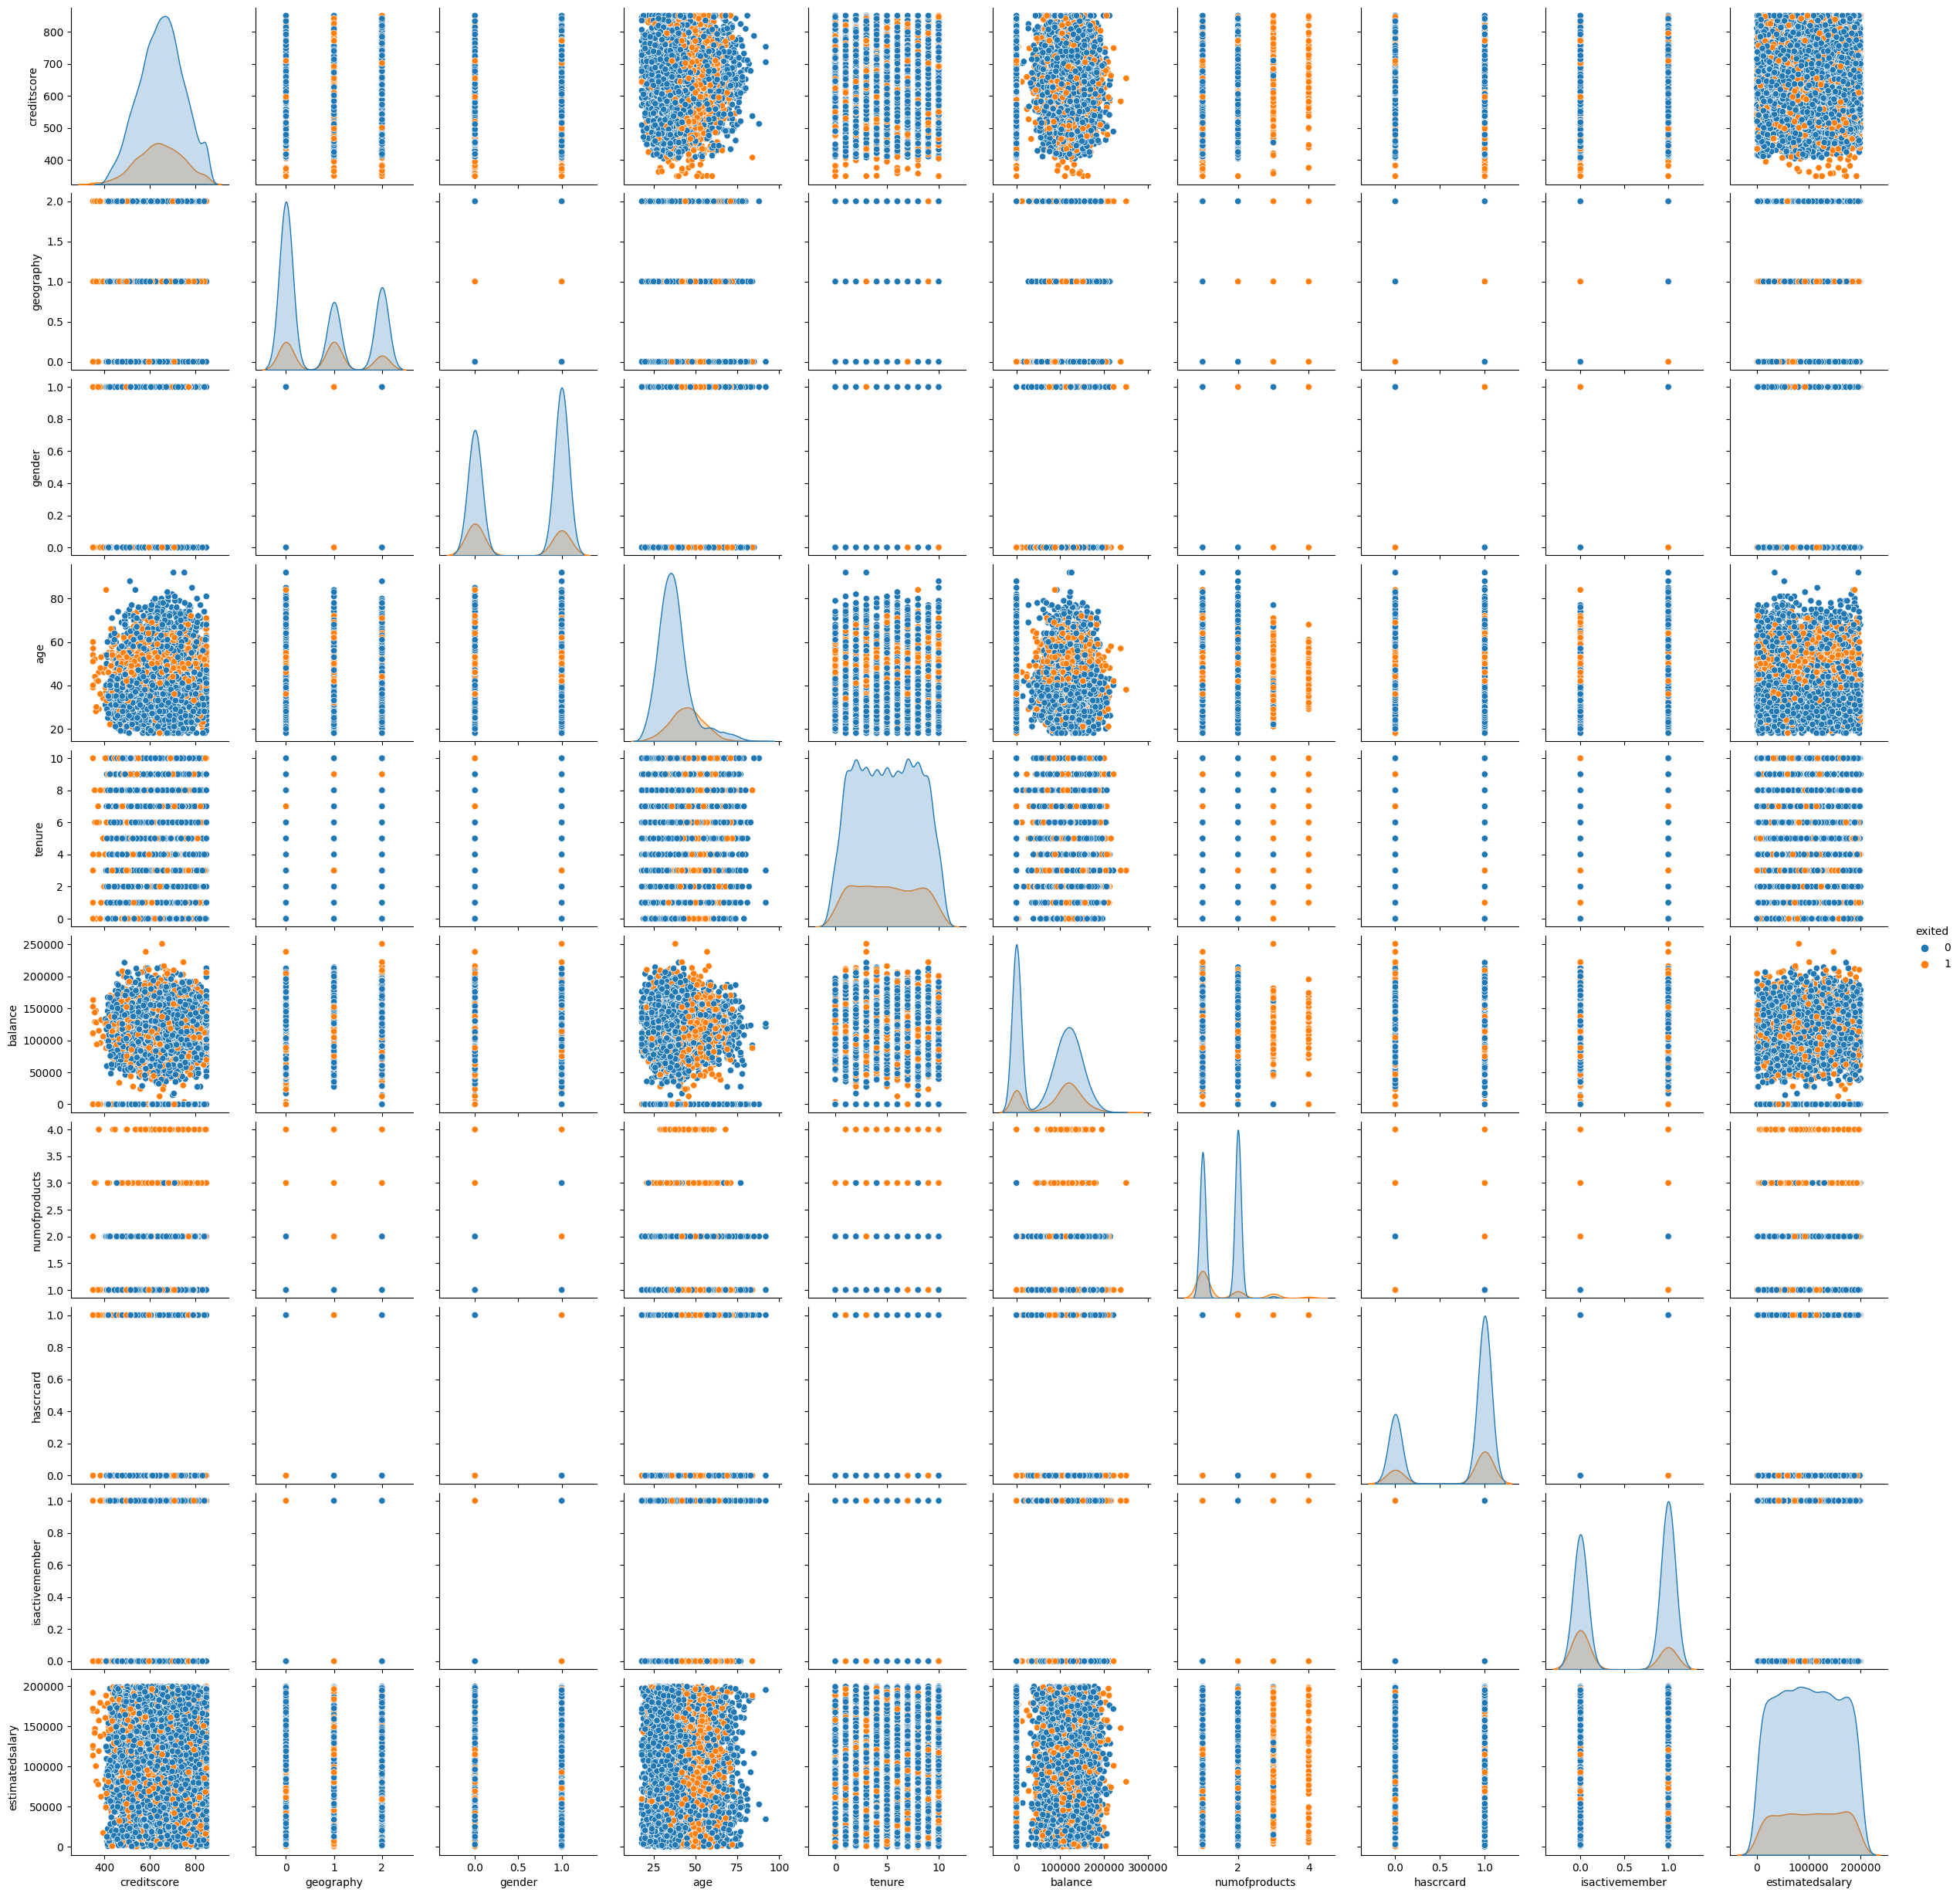

In [ ]:
sns.pairplot(data, hue='exited')

In [ ]:
#Рассчитаем корреляцию между показателями
data.corr()['exited'].sort_values(ascending=False)

exited             1.000000
age                0.285323
balance            0.118533
geography          0.035943
estimatedsalary    0.012097
hascrcard         -0.007138
tenure            -0.014001
creditscore       -0.027094
numofproducts     -0.047820
gender            -0.106512
isactivemember    -0.156128
Name: exited, dtype: float64

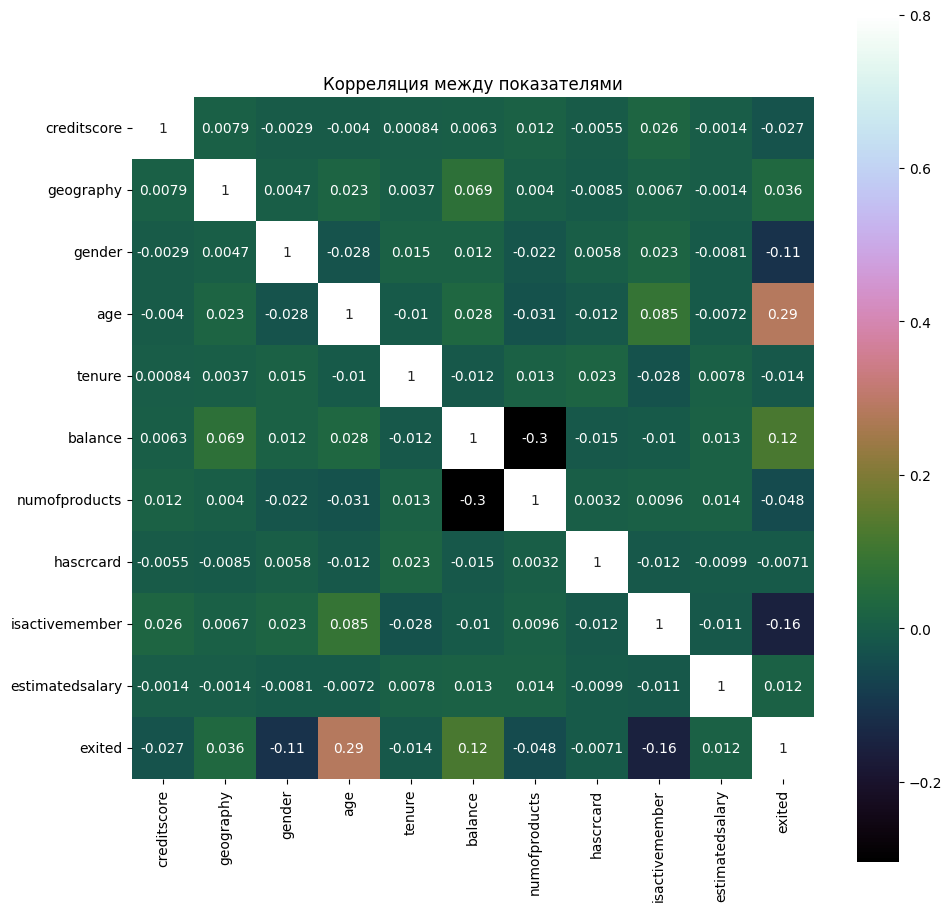

In [ ]:
#Визуализируем при помощи создания корреляционной матрицы
correlation = data.corr()
plt.figure(figsize=(11,11))
sns.heatmap(correlation, vmax=0.8, square=True,annot=True,cmap='cubehelix')

plt.title('Корреляция между показателями')
plt.show()

На матрице корреляции видим, что все признаки незначительно коррелируют друг с другом. Так как наша целевая переменная – отток клиентов банка (столбец Exited), то оценим корреляцию всех критериев с данным показателем.
Наибольшая отрицательная корреляция с показателем оттока клиентов у показателя статуса клиента (столбец IsActiveMember). Здесь все понятно, связь обратная, если клиент неактивен, то он подвержен оттоку.
Наибольшая положительная корреляция с показателем оттока клиентов у признаков:
1.	Возраст (столбец age)
2.	Баланс счета (столбец balance)
3.	Страна проживания (столбец geography)

Рассмотрим влияние данных показателей на отток по отдельности.


In [ ]:
#Рассчитаем процент ушедших клиентов, сгруппировав по возрасту
Age_Exited = data.pivot_table(index = 'age', values = 'exited', aggfunc = ['sum', 'count'])
Age_Exited.columns = Age_Exited.columns.droplevel(level=1)
Age_Exited['perc'] = Age_Exited['sum']/Age_Exited['count']*100
Age_Exited

,sum,count,perc
age,,,
18,2,22,9.090909
19,1,27,3.703704
20,2,40,5.000000
21,3,53,5.660377
22,12,84,14.285714
...,...,...,...
83,0,1,0.000000
84,1,2,50.000000
85,0,1,0.000000


<Axes: title={'center': 'Процент ушедших клиентов по возрасту'}, xlabel='Возраст', ylabel='Процент ушедших клиентов'>

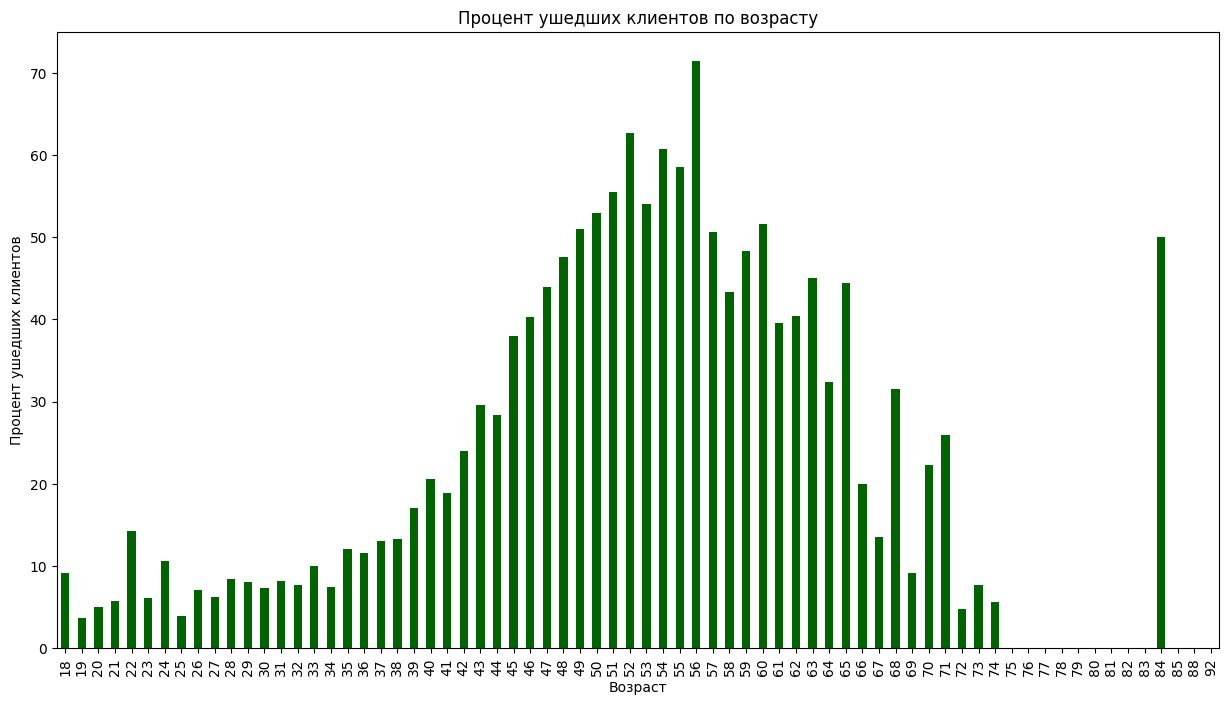

In [ ]:
#Построим столбчатую диаграмму
Age_Exited['perc'].plot(kind='bar', title = 'Процент ушедших клиентов по возрасту', xlabel = 'Возраст', ylabel = 'Процент ушедших клиентов',
                              figsize = (15,8), color = 'darkgreen')

<Axes: title={'center': 'Отток клиентов в зависимости от возраста'}, xlabel='age'>

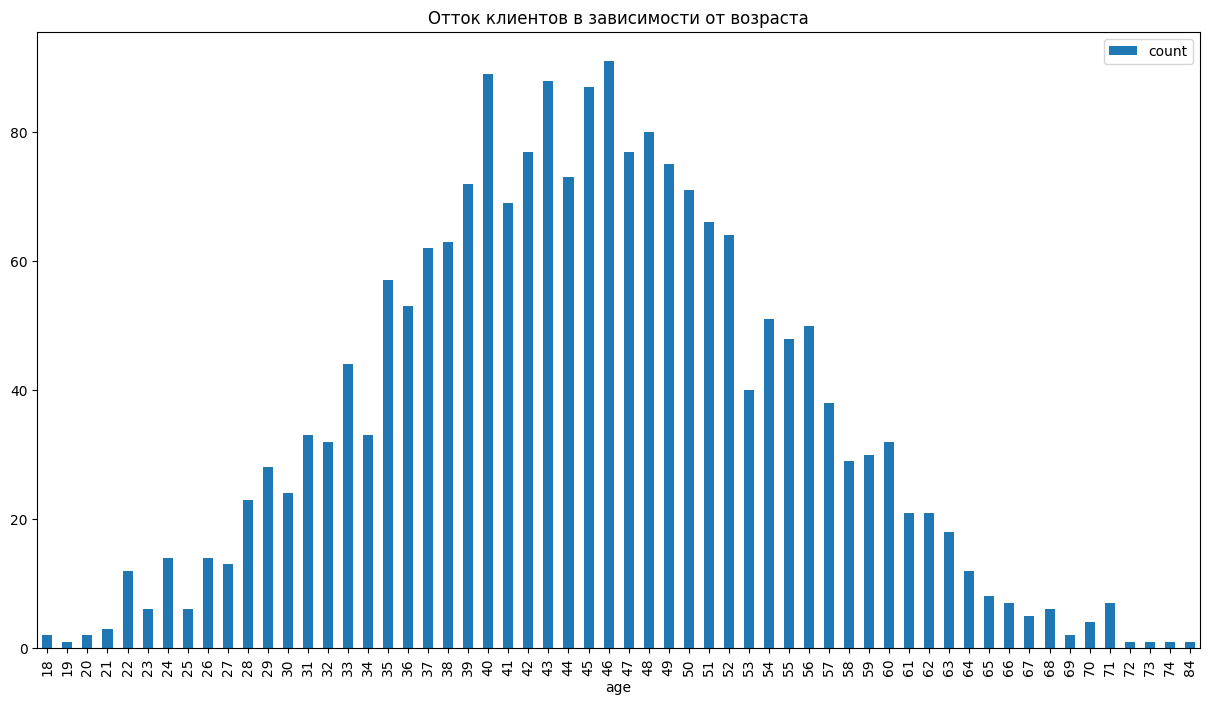

In [ ]:
#Распределение уходящих клиентов по возрасту в количественном измерении
data[data['exited']==1]['age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='age').plot(kind='bar', figsize = (15,8), x = 'age', y = 'count', title='Отток клиентов в зависимости от возраста')

На графиках видим, что банк не покидают клиенты в возрасте 75-92 года, за исключением одного клиента в возрасте 84 года. Но четко прослеживается тенденция к оттоку, начиная с возраста 45 лет, пик оттока приходится на возраст клиентов 56 лет.

<Axes: title={'center': 'Гистограмма медианного баланса денег у оставшихся и ушедших клиентов'}, xlabel='exited'>

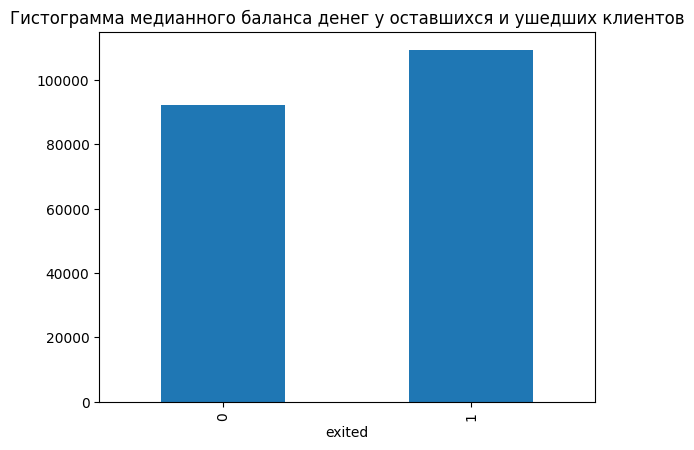

In [ ]:
data.groupby('exited')['balance'].median().plot(kind ='bar',title ='Гистограмма медианного баланса денег у оставшихся и ушедших клиентов')

На гистограмме видно, что зависимость не сильная, но среднее значение баланса немного выше у тех кто ушел.

In [ ]:
#Рассчитаем процент ушедших клиентов по стране проживания
Geography_Exited = data.pivot_table(index = 'geography', values = 'exited', aggfunc = ['sum', 'count'])
Geography_Exited.columns = Geography_Exited.columns.droplevel(level=1)
Geography_Exited['perc'] = Geography_Exited['sum']/Geography_Exited['count']*100
Geography_Exited

,sum,count,perc
geography,,,
0,810,5014,16.154767
1,814,2509,32.443204
2,413,2477,16.673395


In [ ]:
geography_exited = data.groupby('exited')['geography'].value_counts().reset_index(level='exited')
geography_exited.columns = ('exited', 'number')
geography_exited = geography_exited.sort_values(by='geography')
geography_total = geography_exited.pivot_table(index='geography', values='number', aggfunc='sum')
print(geography_exited)
print(geography_total)

           exited  number
geography                
0               0    4204
0               1     810
1               0    1695
1               1     814
2               0    2064
2               1     413
           number
geography        
0            5014
1            2509
2            2477


In [ ]:
#Визуализируем данные по оттоку клиентов в завсимости от страны проживания на графике

labels = ['France','Germany','Spain']
labels1 = ['No exited', 'Exited', ' ', '     ', '  ', '      ']
outer_values = [geography_total['number'][0], geography_total['number'][1], geography_total['number'][2]]
inner_values = geography_exited['number']

trace1 = go.Pie(
    hole=0.3,
    sort=False,
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    showlegend= False,
    labels=labels1,
    textinfo='label',
    textposition='inside',
    marker={'colors': ['green', 'darkorange', 'green', 'darkorange','green', 'darkorange'],
            'line': {'color': 'white', 'width': 0}}
)
trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=outer_values,
    labels=labels,
    textinfo='percent',
    textposition='inside',
    marker={'colors': ['lightblue', 'lightorange', 'lightpurple'],
            'line': {'color': 'white', 'width': 2}}
)

layout = go.Layout(height = 600,
                   width = 600,
                   autosize = True,
                   title = 'Отток клиентов по стране проживания',
                   title_font_size=25,
                   title_x=0.5)
fig = go.FigureWidget(data=[trace1, trace2], layout=layout)

fig.show()

<Axes: title={'center': 'Процент ушедших клиентов по стране проживания'}, xlabel='Страна проживания', ylabel='Процент ушедших клиентов'>

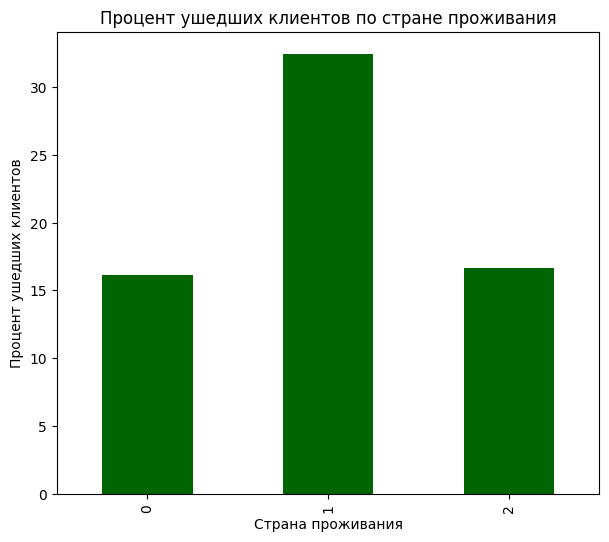

In [ ]:
#Построим столбчатую диаграмму
Geography_Exited['perc'].plot(kind='bar', title = 'Процент ушедших клиентов по стране проживания', xlabel = 'Страна проживания', ylabel = 'Процент ушедших клиентов',
                              y = [16, 32, 16], figsize = (7,6), color = 'darkgreen')

По графику видим высокий отток клиентов в Германии - 32%, во Франции и Испании процент оттока в два раза ниже - по 16%.

<Axes: title={'center': 'Отток клиентов в зависимости от страны проживания'}, xlabel='geography'>

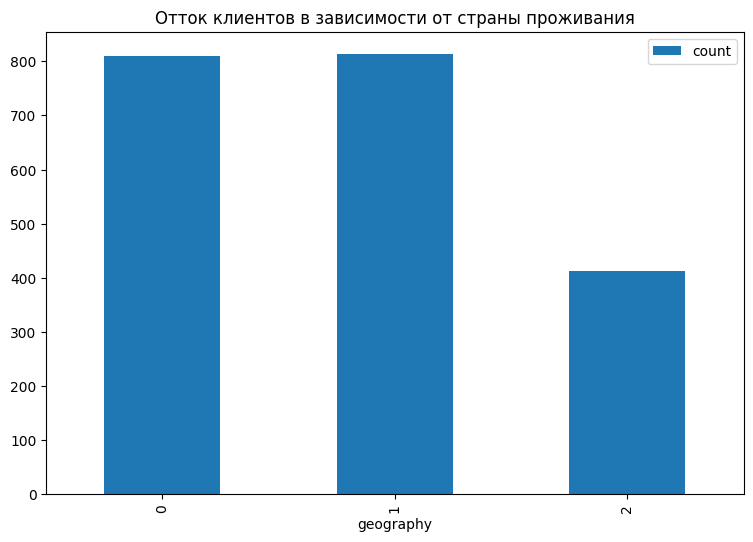

In [ ]:
#Распределение уходящих клиентов по стране проживания в количественном измерении
data[data['exited']==1]['geography'].value_counts().reset_index().rename(columns={'index':'geography', 'geography':'count'}).\
sort_values(by='geography').plot(kind='bar', figsize = (9,6), x = 'geography', y = 'count',
                                 title='Отток клиентов в зависимости от страны проживания')

По гистограмме оттока клиентов в количественно измерении видим, что отток во Франции и Германии на одном уровне (чуть более 800 клиентов), но во Франции проживает в 2 раза больше клиентов, чем в Германии.

Построение модели

Обучим модель для прогнозирования оттока клиентов.
Модель логистической регрессии используется в тех случаях, когда зависимая переменная бинарна по своей природе, то есть попадает в одну из двух категорий. Это наш случай, прогноз - уйдет клиент из банка или нет.

In [ ]:
#Делим все данные отдельно на признаки (X) и целевую переменную (y)
X = data.drop(['exited'], axis = 1)
y = data['exited']

In [ ]:
# разделим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Важно выполнить масштабирование функций, потому что значения возраста, баланс счета, расчетной зарплаты и кредитного рейтинга лежат в разных диапазонах. Если мы не масштабируем функции, то функции расчетной зарплаты, баланса и кредитного рейтинга будут доминировать над функцией возраста, когда модель найдет ближайшего соседа к точке данных в пространстве данных.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train[0:10, :])
print('------------------------------------------------------------------------')
print(X_test[0:10, :])

[[ 0.16958176  1.51919821 -1.09168714 -0.46460796  0.00666099 -1.21571749
   0.8095029   0.64259497 -1.03227043  1.10643166]
 [-2.30455945  0.3131264   0.91601335  0.30102557 -1.37744033 -0.00631193
  -0.92159124  0.64259497  0.9687384  -0.74866447]
 [-1.19119591 -0.89294542 -1.09168714 -0.94312892 -1.031415    0.57993469
  -0.92159124  0.64259497 -1.03227043  1.48533467]
 [ 0.03556578  1.51919821  0.91601335  0.10961719  0.00666099  0.47312769
  -0.92159124  0.64259497 -1.03227043  1.27652776]
 [ 2.05611444  1.51919821 -1.09168714  1.73658844  1.04473698  0.8101927
   0.8095029   0.64259497  0.9687384   0.55837842]
 [ 1.29325423  0.3131264  -1.09168714 -0.17749539 -1.031415    0.44253504
   0.8095029   0.64259497 -1.03227043  1.63252134]
 [ 1.6128308  -0.89294542  0.91601335  0.77954653 -1.37744033  0.30432823
  -0.92159124 -1.55619021 -1.03227043  0.48149647]
 [-0.54173384  1.51919821  0.91601335  0.20532138  1.04473698 -1.21571749
   0.8095029   0.64259497  0.9687384   1.07382167]
 

Здесь сразу видно, что все значения характеристик масштабируются и теперь находятся в соотношении от -1 до 1. Следовательно, каждая функция будет в равной степени способствовать принятию решений.

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Для тестирования классификатора мы используем тренировочные и тестовые данные, сгенерированные ранее.

Это создает одномерный массив для всего набора обучающих данных, дающий прогноз для каждой строки в массиве X.

In [ ]:
y_pred_1 = classifier.predict(X_train)
y_pred_1

Выходные данные на тренировочной выборке показывают, что один клиент из шести являются потенциальным кандидатом на отток.

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

Выходные данные на тестовой выборке показывают, что первые и последние три клиента не являются потенциальными кандидатами на отток.



Вы можете изучить весь массив, чтобы отсортировать потенциальных клиентов, склонных к оттоку.


In [ ]:
for x in range(len(y_pred)):
   if (y_pred[x] == 1):
      print(x, end=",")

5,9,42,54,64,69,70,73,80,84,85,111,113,117,131,154,161,182,213,227,252,308,365,377,388,405,423,434,452,465,481,483,485,493,513,526,543,563,576,580,598,607,616,625,627,631,639,644,681,700,706,756,765,773,778,794,822,856,864,894,895,927,950,999,1021,1031,1035,1037,1048,1070,1089,1110,1116,1123,1128,1137,1138,1139,1171,1180,1194,1209,1215,1220,1257,1275,1330,1348,1357,1369,1374,1381,1390,1402,1430,1446,1447,1455,1497,1500,1533,1568,1576,1581,1616,1637,1661,1681,1715,1726,1745,1765,1769,1788,1830,1848,1850,1857,1877,1895,1908,1931,1956,1968,1975,

В выходных данных показаны индексы всех строк, которые являются вероятными кандидатами на отток. Эти данные могут быть отсортированы и переданы в отдел маркетинга для дальнейшей работы.

Мы можем проанализировать, насколько хорошо наша модель работает с тестовым набором данных. Создадим матрицу путаницы для модели. Показатели используются для проверки производительности модели на основе прогнозируемых и фактических значений.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1542   53]
 [ 333   72]]


Истинно положительные прогнозы: 1542 (класс положительный и модель классифицирует его как положительный)

Истинно отрицательные прогнозы: 53 (класс отрицательный, а модель классифицирует его как положительный)

Ложноположительные прогнозы: 333 (положительный класс, классифицируемый моделью как отрицательный)

Ложноотрицательные прогнозы: 72 (отрицательный класс, классифицируемый моделью как положительный)

Рассчитаем показатель производительности – точность модели отдельно по тренировочным данным и по тестовым данным.

In [ ]:
print("Accuracy : ", accuracy_score(y_train, y_pred_1))

Accuracy :  0.8085


In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.807


Доля верных прогнозов модели в среднем составила примерно 81%. Для несбалансированных данных это хороший показатель.

Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами существует устойчивая корреляция, тогда как другие параметры практически не влияют на отток.

На основании результатов анализа даны рекомендации заинтересованным лицам.
Кратко:

•	Компании выгодно, если клиент будет пользоваться как минимум двумя продуктами банка.

•	Компания заинтересована в активных клиентах, ведь их отток однозначно ниже.

•	Мы выяснили, что молодые клиенты чаще остаются в компании.

•	Женщины чаще покидают компанию, необходимо выяснить причины данного явления.

•	Держатели кредитных карт более чем в два раза чаще отказываются от услуг банка.

•	Германия имеет самый высокий показатель оттока среди проанализированных стран.

•	Высокий уровень оттока в возрастной группе 45-65 лет.

Следует постоянно отслеживать и оценивать производительность: регулярно отслеживайте показатели оттока, анализируйте отзывы клиентов и отслеживайте эффективность стратегий удержания. Вносите корректировки на основе данных, чтобы оптимизировать усилия по удержанию клиентов и максимизировать общую прибыль.
